# Machine Learning 101
## Regresión Lineal y la capacidad de los Modelos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = "retina"

In [5]:
ipc_path = "C:/Users/Christopher/Documents/Diplomado/ipc.xlsx" # Modificar a ruta
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "") for c in market]
market.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC*,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA*,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


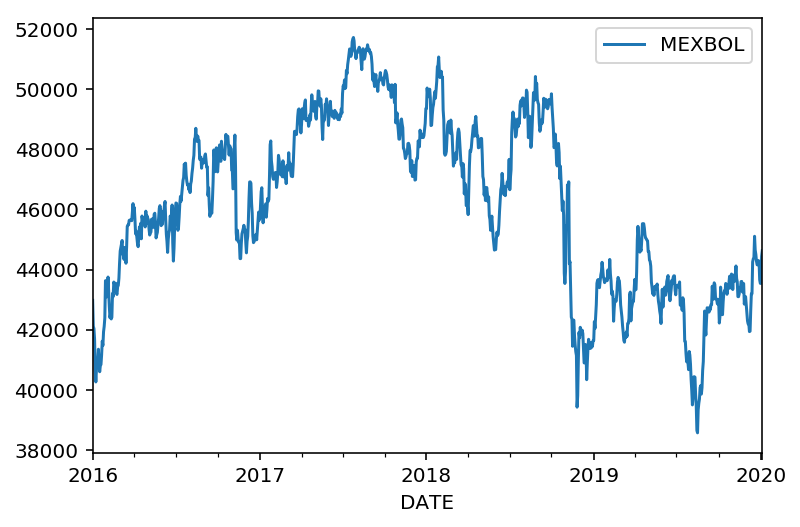

In [6]:
# No es independiente e identicamente distribuida
# P(t) depende totalmente del tiempo P(t-1), P(t-2), ...
# No se distribuye normal
market[["MEXBOL"]].plot()

C:\Users\Christopher\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


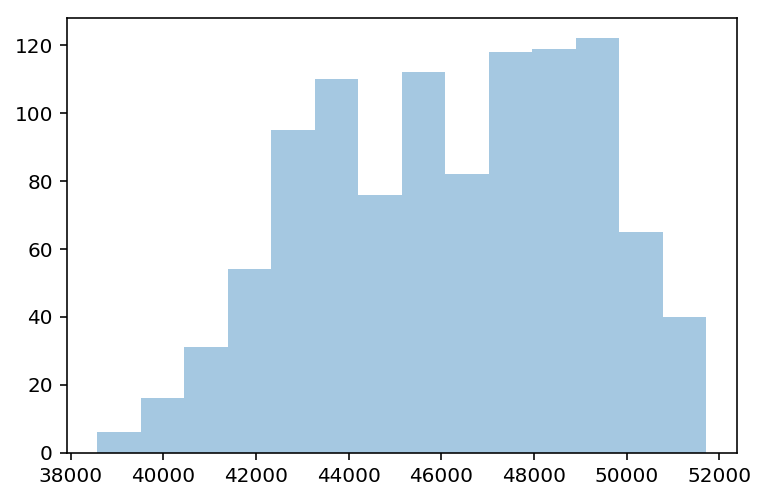

In [7]:
sns.distplot(market[["MEXBOL"]], kde=False)

## Modelar el rendimiento del IPC

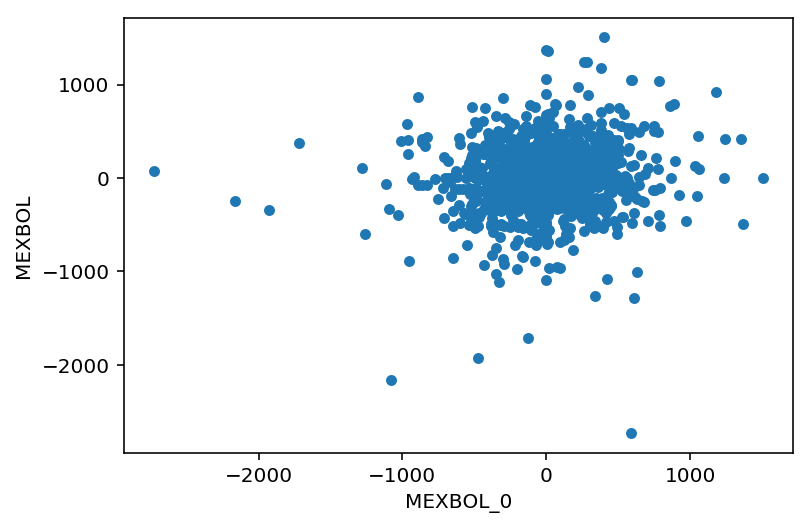

In [8]:
# ¿Puedo estimar el rendimiento del IPC a tiempo t+1
# dado el rendimiento a tiempo t?
R = market[["MEXBOL"]].diff()
R = R.join(R.shift(1).rename({"MEXBOL": "MEXBOL_0"}, axis=1)).dropna()
R.plot.scatter(x="MEXBOL_0", y="MEXBOL")

##  Modelando una regresión Lineal

### Manera 1
Ecuación Normal:
$$
    {\bf w} = (X^TX)^{-1}X^T{\bf t}
$$

In [7]:
from numpy.linalg import inv

In [8]:
x = R[["MEXBOL_0"]]
y = R[["MEXBOL"]]


# primera columna llena de unos; segunda columna con los rendimientos a tiempo t
x = np.c_[np.ones_like(x), x]

In [9]:
inv(x.T @ x) @ x.T @ y

,MEXBOL
0,2.262894
1,0.101867


In [10]:
a, b = (inv(x.T @ x) @ x.T @ y).values.ravel()

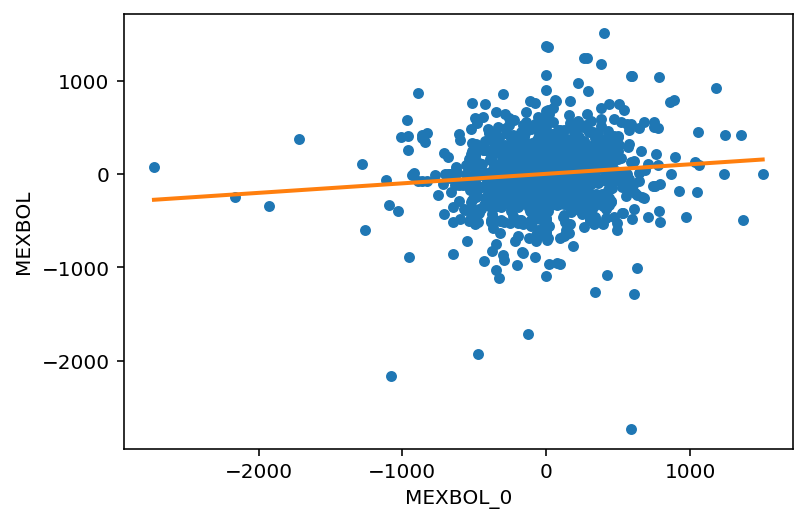

In [11]:
# Límites de la gráfica en el eje de la x
rmin, rmax = R.min().iloc[0].item(), R.max().iloc[0].item()
xrange = np.linspace(rmin, rmax, 20)

R.plot.scatter(x="MEXBOL_0", y="MEXBOL")
plt.plot(xrange, a + xrange * b, linewidth=2, c="tab:orange")

### Manera 2

In [12]:
# conda install statsmodels
from statsmodels.regression.linear_model import OLS # Ordinary Least Squares

In [13]:
model = OLS(y, x).fit()

In [14]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.009     
Dependent Variable: MEXBOL           AIC:                15365.4446
Date:               2020-04-14 19:09 BIC:                15375.3462
No. Observations:   1044             Log-Likelihood:     -7680.7   
Df Model:           1                F-statistic:        10.98     
Df Residuals:       1042             Prob (F-statistic): 0.000954  
R-squared:          0.010            Scale:              1.4407e+05
----------------------------------------------------------------------
         Coef.     Std.Err.      t       P>|t|      [0.025      0.975]
----------------------------------------------------------------------
const    2.2629     11.7474    0.1926    0.8473    -20.7884    25.3142
x1       0.1019      0.0307    3.3133    0.0010      0.0415     0.1622
-------------------------------------------------------------------
Omnibus:             178.952       Durbin-Watson:          1.992   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1083.557
Skew:                -0.633        Prob(JB):               0.000   
Kurtosis:            7.828         Condition No.:          382     
===================================================================

"""

$$
    R^2 = 1 - \frac{\sum_n (y_n - \hat y_n)^2}{\sum_n (y_n - \bar y)^2}
$$

$R^2 \in (-\infty, 1]$

### Manera 3
`scikit-learn`


1. Modelos: modelar los datos
2. Transformers: transformación de los datos
3. Pipelines: proceso de modelación

In [15]:
# paso 1: importar el modelo
from sklearn.linear_model import LinearRegression
# paso 2: inicializar el modelo (con sus hiperparámetros)
model = LinearRegression()
# paso 3: "entrenar" el modelo
model.fit(R[["MEXBOL_0"]], R["MEXBOL"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
model.coef_, model.intercept_

(array([0.10186727]), 2.2628939582501073)

In [17]:
# paso 4: "predecir"
yhat = model.predict(R[["MEXBOL_0"]])

https://jupyterbook.org/intro.html

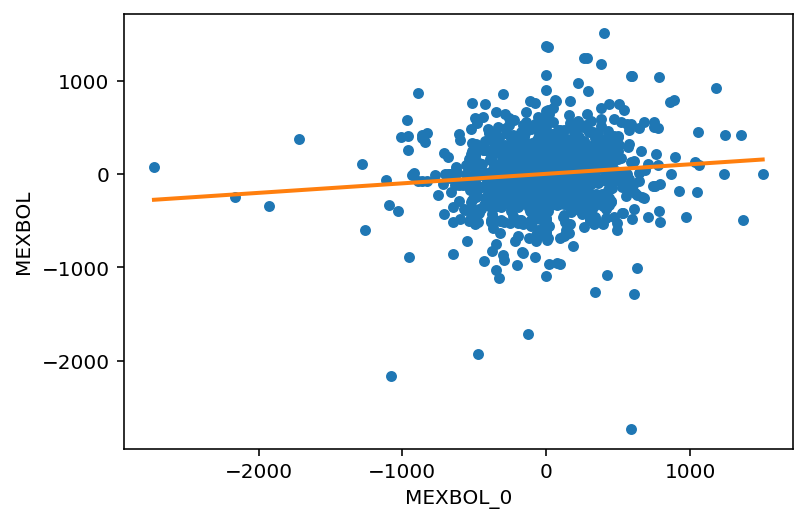

In [18]:
xrange = np.linspace(rmin, rmax, 20)
yhat_range = model.predict(xrange.reshape(-1, 1))

R.plot.scatter(x="MEXBOL_0", y="MEXBOL")
plt.plot(xrange, yhat_range, linewidth=2, c="tab:orange")

#### Métricas de modelo

$$
    MAE = \sum_n \vert y_n - \hat y_n\vert
$$

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error

In [20]:
r2_score(y, yhat)

0.010425844200220968

In [21]:
mean_absolute_error(y, yhat)

276.98608584559

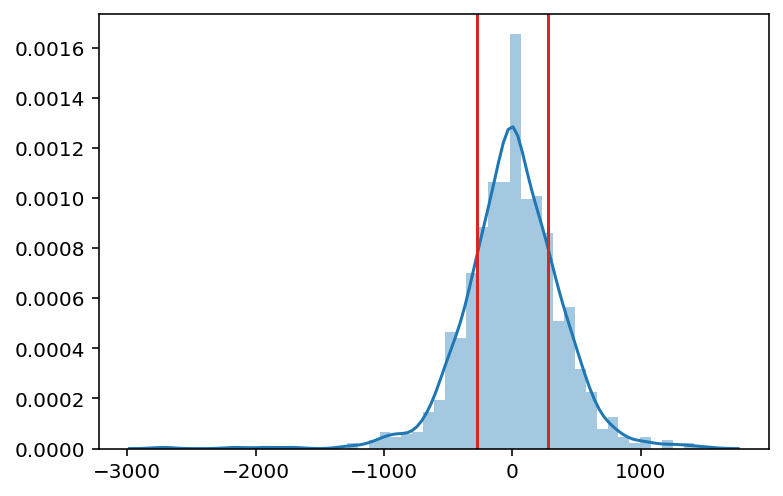

In [22]:
sns.distplot(y)
plt.axvline(x=277, c="tab:red")
plt.axvline(x=-277, c="tab:red")

## Capacidad de un modelo

Es la habilidad que tiene este (el modelo) para aprender una amplia variedad de funcions. A mayor capacidad, más compleja es la relación que podemos capturar de los datos.

----

Ejemplo

$$
    {\bf w}^T {\bf x} = w_0 + w_1 x + w_2  x ^2
$$

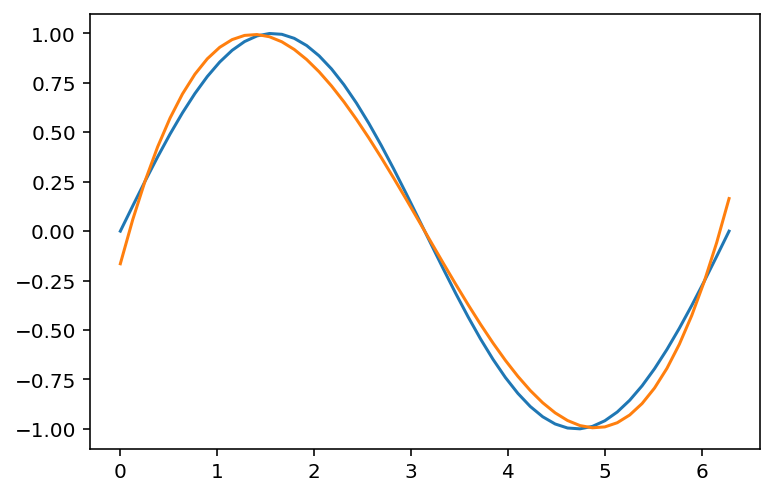

In [23]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)

xhat = np.c_[x, x**2, x**3]
model = LinearRegression()
model.fit(xhat, y)

plt.plot(x, y)
plt.plot(x, model.predict(xhat))

### Transformers

In [24]:
# paso 1: importar el transfomer
from sklearn.preprocessing import PolynomialFeatures
# paso 2: inicializar el transformer (con sus hiperparámetros)
poly = PolynomialFeatures(degree=2, include_bias=False)
# paso 3: "entrenar" el transfomer **
poly.fit(x.reshape(-1, 1)) # siempre vector columna
# paso 4: hacer una transformación **
poly.transform(x.reshape(-1, 1))[:5]

array([[0.        , 0.        ],
       [0.12822827, 0.01644249],
       [0.25645654, 0.06576996],
       [0.38468481, 0.14798241],
       [0.51291309, 0.26307983]])

In [25]:
# Paso 3 & 4 juntos: "entrar" y transformar los datos
poly.fit_transform(x.reshape(-1, 1))[:5]

array([[0.        , 0.        ],
       [0.12822827, 0.01644249],
       [0.25645654, 0.06576996],
       [0.38468481, 0.14798241],
       [0.51291309, 0.26307983]])

In [26]:
poly.get_feature_names()

['x0', 'x0^2']

#### Ejemplo Seno 

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)

poly = PolynomialFeatures(degree=3, include_bias=False)
xhat = poly.fit_transform(x.reshape(-1, 1))
model = LinearRegression()
model.fit(xhat, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Pipeline: Transformaciones + Modelación

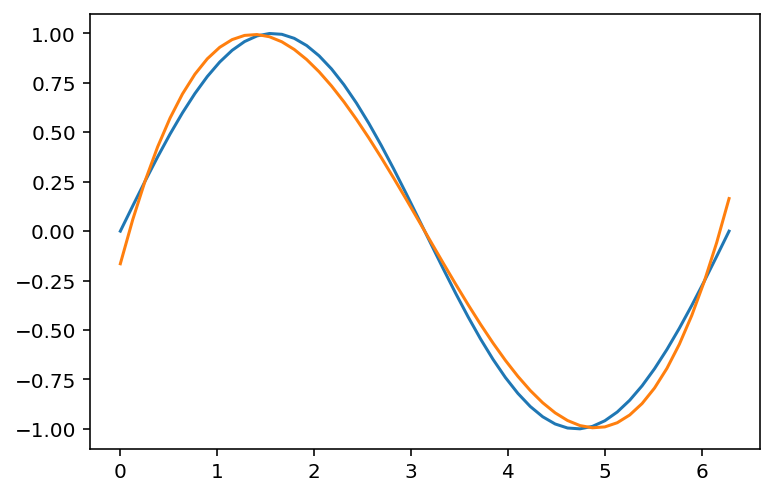

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lr", LinearRegression(fit_intercept=True))
])

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)

pipe.fit(x.reshape(-1, 1), y)

yhat = pipe.predict(x.reshape(-1, 1))

plt.plot(x, y)
plt.plot(x, yhat)

## Mejorando la $R^2$ incrementando la capacidad

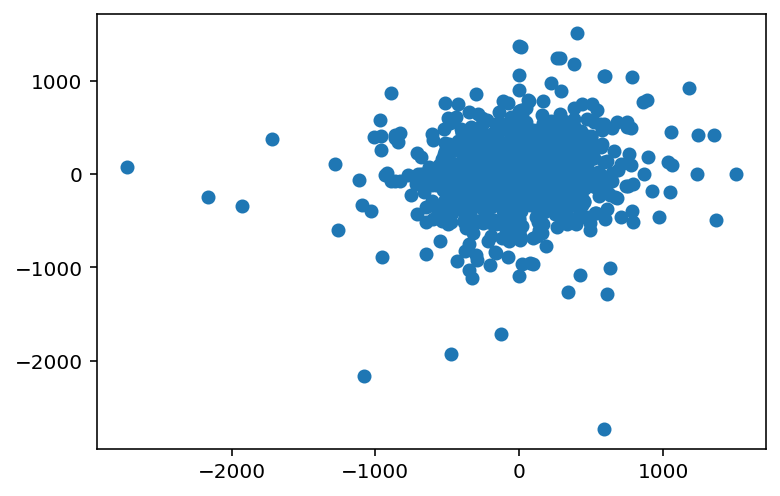

In [29]:
xtrain = R[["MEXBOL_0"]]
ytrain = R["MEXBOL"]

plt.scatter(xtrain, ytrain)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("model", LinearRegression(fit_intercept=False))
])

pipe.fit(xtrain, ytrain)
yhat0 = pipe.predict(xtrain)
r2_score(ytrain, yhat0)

0.010784596514037958

### Incrementando la capacidad considerando más variables

Quiero estimar el retorno del IPC a tiempo $t + 1$ considerando el retorno previo de **todos** sus componentes

In [31]:
Rmkt = market.diff().dropna()

In [32]:
Xall = Rmkt.drop("MEXBOL", axis=1)
Xall = Xall.join(Rmkt["MEXBOL"].shift(-1)).dropna()

Xtrain = Xall.drop("MEXBOL", axis=1)
ytrain = Xall["MEXBOL"]

In [33]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
yhat1 = model.predict(Xtrain)
r2_score(ytrain, yhat1)

0.06670264622025401

In [34]:
Xpoly = np.ones((10, 2))
poly = PolynomialFeatures(degree=3)
poly.fit(Xpoly)
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


In [35]:
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("model", LinearRegression(fit_intercept=False, n_jobs=-1))
])

pipe.fit(Xtrain, ytrain);

In [36]:
yhat2 = pipe.predict(Xtrain)
r2_score(ytrain, yhat2)

0.9249181867857078

### Evaluando el poder predictivo

In [37]:
from sklearn.model_selection import train_test_split

Xtrain = Xall.drop("MEXBOL", axis=1)
ytrain = Xall["MEXBOL"]

Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=1643)

In [38]:
ytrain.shape, ytest.shape

((536,), (135,))

In [39]:
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("model", LinearRegression(fit_intercept=False, n_jobs=-1))
])

pipe.fit(Xtrain, ytrain)
yhat2 = pipe.predict(Xtrain)
r2_score(ytrain, yhat2)

0.947358597146964

In [41]:
yhat_final = pipe.predict(Xtest)
format(r2_score(ytest, yhat_final), ",f")

'-151,637,387,097,217,728,512.000000'

## OVERFITTING!

## Rige Regression

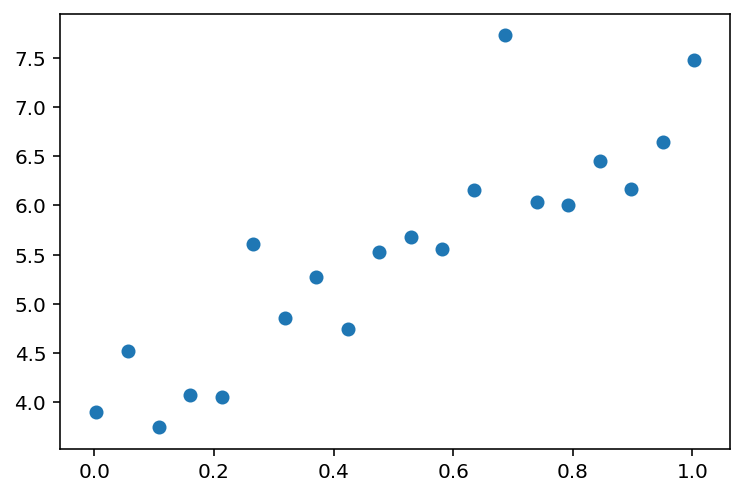

In [46]:
x = np.linspace(0, 1, 20) + np.random.uniform(0, 0.02)
y = 4 + 3 * x + np.random.randn(20) * 0.5

plt.scatter(x, y)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

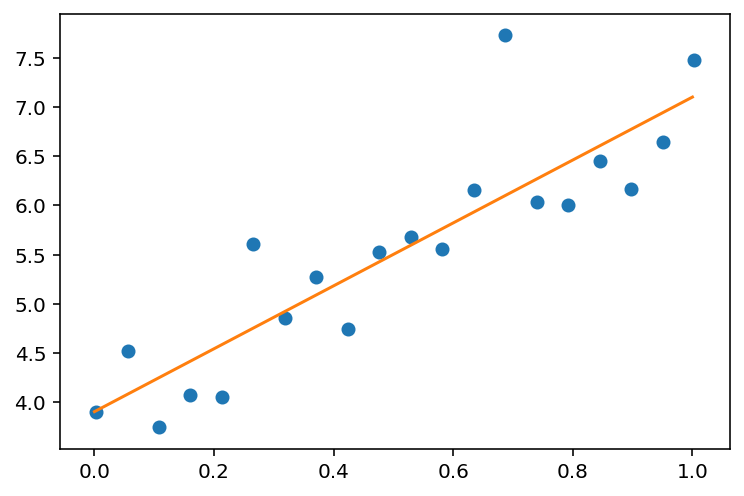

In [60]:
xtest = np.linspace(0, 1, 30).reshape(-1, 1)
yhat = lr.predict(xtest)

plt.scatter(x, y)
plt.plot(xtest, yhat, c="tab:orange")

In [63]:
lr.coef_, lr.intercept_

(array([3.19378709]), 3.904843237154064)

In [79]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=10)
lasso = Lasso(alpha=10)
ridge.fit(x.reshape(-1, 1), y)
lasso.fit(x.reshape(-1, 1), y)

w_ridge, *_ = ridge.coef_
w_lasso, *_ = lasso.coef_

In [81]:
print(w_ridge, w_lasso)

0.4968113253322732 0.0


In [85]:
lasso.intercept_

5.510508052976765

In [86]:
y.mean()

5.510508052976765

Ridge

$$
    ||Xw - t||^2 + \alpha||w||^2
$$

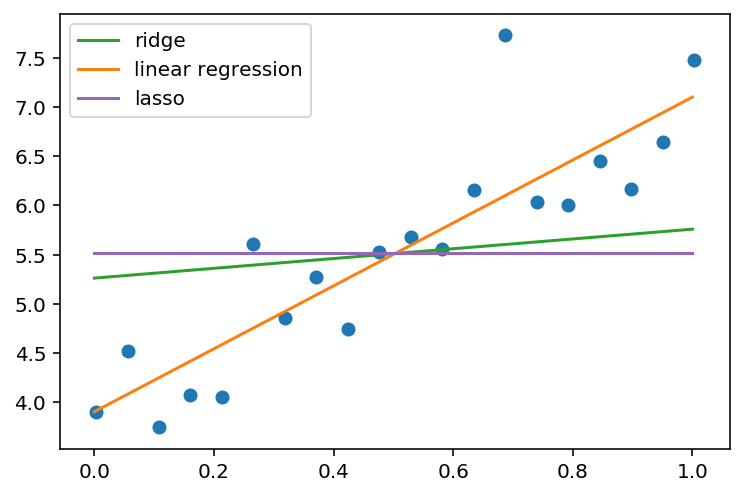

In [84]:
xtest = np.linspace(0, 1, 30).reshape(-1, 1)
yhat_lr = lr.predict(xtest)
yhat_ridge = ridge.predict(xtest)
yhat_lasso = lasso.predict(xtest)

plt.scatter(x, y)
plt.plot(xtest, yhat_ridge, c="tab:green", label="ridge")
plt.plot(xtest, yhat_lr, c="tab:orange", label="linear regression")
plt.plot(xtest, yhat_lasso, c="tab:purple", label="lasso")
plt.legend()

## Cross Validation

In [87]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [90]:
ipc_path = "~/Dropbox (Analysic)/Analysic-Nabla/Proyectos/Diplomado/ipc.xlsx" 
market = pd.read_excel(ipc_path, index_col=0)
market.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [172]:
Rmkt = market.pct_change().dropna()

Xall = Rmkt.drop("MEXBOL INDEX", axis=1)
Xall = Xall.join(Rmkt["MEXBOL INDEX"].shift(1)).dropna()

Xtrain = Xall.drop("MEXBOL INDEX", axis=1)
ytrain = Xall["MEXBOL INDEX"]

In [173]:
test_period = "2019-12"
Xtest, ytest = Xtrain[test_period:], ytrain[test_period:]
Xtrain, ytrain = Xtrain[:"2019-11":], ytrain[:"2019-11"]

In [188]:
model = LinearRegression()

In [189]:
from sklearn.model_selection import cross_validate

In [190]:
metrics = ["r2", "neg_mean_absolute_error"]
ans = cross_validate(model, Xtrain, ytrain, cv=5, scoring=metrics)

In [191]:
ans["test_r2"].mean()

-0.10979935730289095

In [192]:
mae = -ans["test_neg_mean_absolute_error"]
mae.mean()

0.006473362740905672

In [193]:
from sklearn.metrics import mean_absolute_error

In [194]:
model.fit(Xtrain, ytrain)
#yhat = model.predict(Xtest)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
sorted(model.coef_)[::-1][:10]

[0.07420608480082767,
 0.06410658278850397,
 0.0638481331401265,
 0.05683191889682543,
 0.037381500557124935,
 0.03318130412143239,
 0.025337489219075252,
 0.023779774755812604,
 0.02179635946596764,
 0.01862559719022305]

In [139]:
mean_absolute_error(ytest, yhat)

0.007070053582194746

<h2 style="color:crimson">Ejercicio</h2>

Repite el ejercicio anterior considerando un Ridge Regression.
* ¿Qué resultados arroja sobre el CV set?
* ¿Qué resultados arroja sobre el test set?

In [199]:
model = Ridge(alpha=100)
metrics = ["r2", "neg_mean_absolute_error"]
ans = cross_validate(model, Xtrain, ytrain, cv=5, scoring=metrics)
ans["test_r2"].mean()

-0.0012876926265607213

In [200]:
np.set_printoptions(suppress=True, precision=4)

In [202]:
model.fit(Xtrain, ytrain)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### GridSearchCV

In [ ]:
Ridge()

In [224]:
from numpy.random import uniform
alpha_list = uniform(0.1, 1, 300)

In [221]:
from sklearn.model_selection import GridSearchCV

params = {
    "alpha": alpha_list
}

# Inicializando el modelo
gcv = GridSearchCV(Ridge(), params, scoring="r2")
gcv.fit(Xtrain, ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.4862, 0.4417, 0.3158, 0.3371, 0.3256, 0.3011, 0.2767, 0.26  ,
       0.2647, 0.4719, 0.4507, 0.4182, 0.4054, 0.4805, 0.2694, 0.2821,
       0.3859, 0.4976, 0.4398, 0.3524])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [222]:
gcv.best_params_

{'alpha': 0.4053712916497906}

In [234]:
gcv.predict(Xtest)[0]|

-0.0005648481391178372

In [ ]:
est = Xtest @ gcv.best_estimator_.coef_.reshape(-1, 1) + gcv.best_estimator_.intercept_

In [246]:
res = pd.Series(gcv.best_estimator_.coef_, Xtrain.columns)
res = res.reset_index().rename({"index": "asset", 0: "value"}, axis=1)

In [247]:
# conda install -c plotly plotly=4.6.0
import plotly.express as px

In [ ]:
px.bar(res, x="asset", y="value")

<h1 style="color:crimson">Tarea</h1>

* Entrenar un modelo Lasso con GridSearchCV usando un pipeline de polinomios de segundo grado
* Graficar coeficientes "significativos"
* Revisar cuantos parámetros son mayores a 1e-2

In [ ]:
## Hint: usando parámetros dentro de un pipeline
# para usar dentro de GridSearchCV
pipe = Pipeline([
    "paso1": PolynomialFeatures(),
    "model": LinearRegression()
])

params = {
    "model__normalize": [True, False]
}

In [2]:
# importamos las librerias necesarias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_validate
import plotly.express as px
from sklearn.model_selection import GridSearchCV

In [4]:
#Importamos los datos del IPC
ipc_path = "C:/Users/Christopher/Documents/Diplomado/ipc.xlsx" 
market = pd.read_excel(ipc_path, index_col=0)
market.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [5]:
Rmkt = market.pct_change().dropna()

Xall = Rmkt.drop("MEXBOL INDEX", axis=1)
Xall = Xall.join(Rmkt["MEXBOL INDEX"].shift(1)).dropna()

Xtrain = Xall.drop("MEXBOL INDEX", axis=1)
ytrain = Xall["MEXBOL INDEX"]

In [6]:
#Partimos el set en test y train 
test_period = "2019-12"
Xtest, ytest = Xtrain[test_period:], ytrain[test_period:]
Xtrain, ytrain = Xtrain[:"2019-11":], ytrain[:"2019-11"]

In [11]:
#Alphas 
alpha = np.random.uniform(0.1, 1, 300)

#Definimos el  grado del polinomio 
g_pol = 2

#Genera modelo
lasso_pipe = Pipeline([
    ("poly", PolynomialFeatures(g_pol)),
    ("lasso", Lasso())
])

grid = {
    "lasso__alpha": alpha
}

In [12]:
# Inicializando el modelo
gsearch = GridSearchCV(lasso_pipe, grid, scoring="r2")
gsearch.fit(Xtrain, ytrain)

C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lasso__alpha': array([0.66828, 0.3256 , ..., 0.39298, 0.21072])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [14]:
print("Coef:",len(gsearch.best_estimator_.named_steps['lasso'].coef_.reshape(-1, 1)))

Coef: 666


In [16]:

print("Inter: ",len(gsearch.best_estimator_.named_steps['lasso'].intercept_.reshape(-1, 1)))

Inter:  1


In [17]:
print("E: ",len(Xtrain))

E:  646


In [15]:
print("Test: ",len(Xtest))

Test:  25


In [10]:
res = pd.Series(gsearch.best_estimator_.named_steps['lasso'].coef_[:35], Xtrain.columns)
res = res.reset_index().rename({"index": "asset", 0: "value"}, axis=1)